<a href="https://colab.research.google.com/github/Samuel-Solomon-1/Assignment-10-Customer-Review-Sentiment-Analysis/blob/main/Assignment_10_Customer_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Product: Amazon Alexa**


## **Assignment Natural Language processsing - Sentiment Analysis**

### **Customer Review Classification using Random Forest**

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- **The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.** Positive or Negative review?
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews also provided(`amazon_alexa.tsv`)
---




### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a classification model.**



**Dataset Information:**

The dataset consists of customer reviews for Amazon Alexa products, including various features related to the product variation, customer rating, and feedback sentiment.

_Features/Columns_:
* rating: The customer rating of the product (scale of 1 to 5).
* date: The date when the review was posted.
* variation: The variation or type of Alexa product the review is for (e.g., "Charcoal Fabric", "Walnut Finish").
* verified_reviews: The actual review text written by the customer.
* feedback: The target variable indicating the sentiment of the review (1 for positive sentiment and 0 for negative sentiment).



---




## Task 1: Dataset Selection and Preprocessing

For this sentiment analysis project, we selected the **Amazon Alexa Customer Reviews** dataset. This dataset contains customer feedback about Alexa devices, along with metadata such as the product variation, date, rating, and a binary sentiment label (`feedback`) indicating whether the review was positive (`1`) or negative (`0`).

### Preprocessing Steps Performed:

- **Missing Value Handling**: Any missing values in the `verified_reviews` column were filled with empty strings to avoid vectorization errors.
- **Irrelevant Feature Removal**: Columns such as `date` and `rating` were dropped as they do not contribute meaningfully to sentiment classification.
- **Categorical Encoding**: The `variation` feature was encoded using one-hot encoding to convert it into numerical format.
- **Text Transformation**: The review text was converted into a numerical format using `CountVectorizer`, which tokenizes the text and builds a document-term matrix.
- **Data Merging**: The one-hot encoded and vectorized text data were combined into a single feature set.
- **Train-Test Split**: The data was split into training and testing sets using an 80/20 ratio to evaluate the model performance reliably.

These preprocessing steps ensure that the dataset is clean, consistent, and suitable for training a supervised machine learning classification model.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


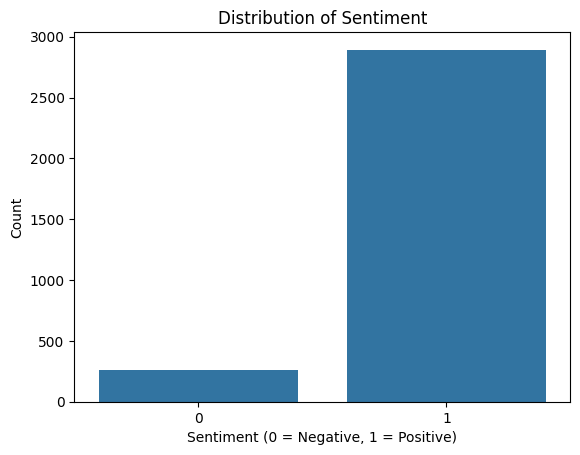

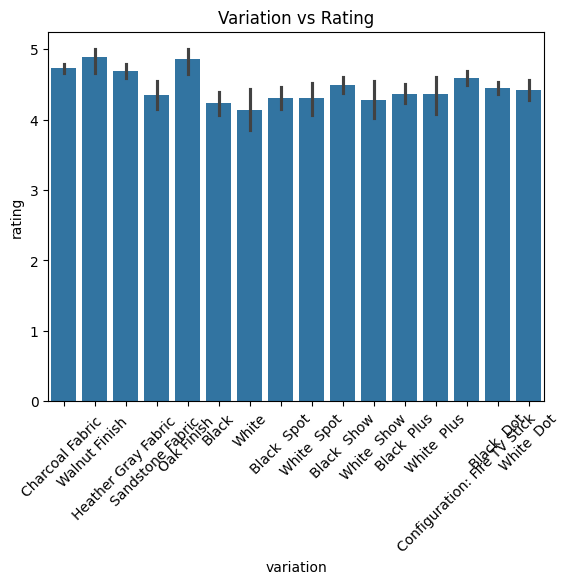

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/amazon_alexa.tsv'  # Update with your path
df = pd.read_csv(file_path, sep='\t')

# Handle missing values in text
df['verified_reviews'] = df['verified_reviews'].fillna("")

# Visualize distribution of sentiment classes
sns.countplot(data=df, x='feedback')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

# Visualize variation vs rating
sns.barplot(data=df, x='variation', y='rating')
plt.xticks(rotation=45)
plt.title('Variation vs Rating')
plt.show()

# Drop irrelevant columns
df.drop(['date', 'rating'], axis=1, inplace=True)

# One-hot encoding for categorical variable 'variation'
df = pd.get_dummies(df, columns=['variation'], drop_first=True)

# Vectorize review text
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(df['verified_reviews'])

# Convert vectorized text to DataFrame
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

# Combine with original dataset (excluding text column)
df = df.drop(['verified_reviews'], axis=1)
df = pd.concat([df.reset_index(drop=True), X_text_df.reset_index(drop=True)], axis=1)

# Feature and target split
X = df.drop('feedback', axis=1)
y = df['feedback']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 2: Feature Engineering

In this step, we transform textual review data into numerical formats that can be used by machine learning models. Text data must be vectorized, as machine learning models only work with numerical input.

### Techniques Implemented:

1. **Bag of Words (CountVectorizer)**:
   - Tokenizes text and creates a document-term matrix (word frequency).
   - Simple yet effective for many NLP tasks.

2. **TF-IDF Vectorization**:
   - Weighs each word’s frequency relative to its importance across all documents.
   - Reduces the impact of commonly used (less informative) words.

3. **Word Embeddings** (using spaCy):
   - Captures semantic relationships between words using pre-trained word vectors.
   - Useful for understanding context and similarity.

4. **t-SNE Visualization**:
   - Applied on word embeddings to reduce their dimensionality to 2D.
   - Helps us explore word groupings and semantic structure visually.

Each of these methods plays a vital role in enabling traditional or deep learning models to understand and process natural language data.

In [11]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Bag of Words Shape: (3150, 1000)
TF-IDF Shape: (3150, 1000)
Vector shape for t-SNE: (296, 300)
Using t-SNE perplexity=30


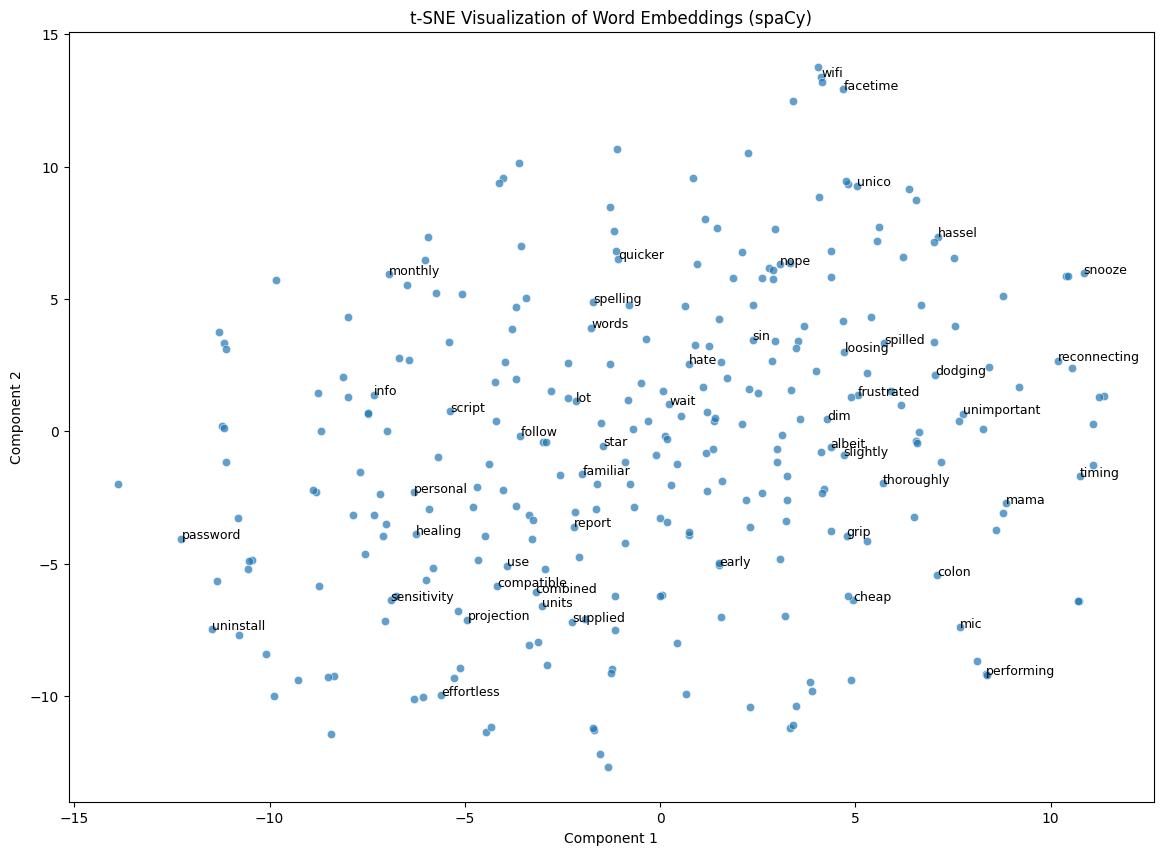

In [3]:
# Task 2: Feature Engineering for NLP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
import spacy

# Reload original data with text and fill missing values
file_path = '/content/drive/MyDrive/amazon_alexa.tsv'  # Update your path here
df = pd.read_csv(file_path, sep='\t')
df['verified_reviews'] = df['verified_reviews'].fillna("")

# --- 1. Bag of Words (CountVectorizer)
bow_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_bow = bow_vectorizer.fit_transform(df['verified_reviews'])
print("Bag of Words Shape:", X_bow.shape)

# --- 2. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['verified_reviews'])
print("TF-IDF Shape:", X_tfidf.shape)

# --- 3. Word Embedding using spaCy with en_core_web_lg model
nlp = spacy.load('en_core_web_lg')

# Tokenize reviews and filter tokens
review_tokens = df['verified_reviews'].apply(
    lambda x: [token for token in nlp(x.lower()) if token.is_alpha and not token.is_stop]
)

# Flatten tokens and get unique words
all_tokens = [token.text for tokens in review_tokens for token in tokens]
unique_tokens = list(set(all_tokens))

# Limit to 300 tokens for faster processing
unique_tokens = unique_tokens[:300]

vectors = []
labels = []

for word in unique_tokens:
    token = nlp.vocab[word]
    if token.has_vector:
        vectors.append(token.vector)
        labels.append(word)

vectors_np = np.array(vectors)
print("Vector shape for t-SNE:", vectors_np.shape)

# --- 4. t-SNE Visualization
# Ensure perplexity < number of samples
perplexity_value = min(30, vectors_np.shape[0] - 1)
print(f"Using t-SNE perplexity={perplexity_value}")

tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
tsne_results = tsne.fit_transform(vectors_np)

# Plotting the t-SNE results
plt.figure(figsize=(14, 10))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], alpha=0.7)

# Annotate the first 50 words
for i, word in enumerate(labels[:50]):
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9)

plt.title("t-SNE Visualization of Word Embeddings (spaCy)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# Task 3: Text Classification Using Traditional Models

In this step, we implement traditional machine learning models to classify the sentiment of customer reviews. Specifically, we use Logistic Regression and Support Vector Machines (SVM) because of their proven effectiveness in text classification tasks.

## Steps:

1. **Text Vectorization:**
   - We transform the preprocessed text data into numerical features using TF-IDF vectorization. This helps represent the importance of words relative to the corpus.

2. **Data Splitting:**
   - The dataset is split into training and testing sets with an 80-20 ratio while preserving the class distribution (stratification).

3. **Model Training and Hyperparameter Tuning:**
   - We use Grid Search with 5-fold cross-validation to find the best hyperparameters for each model.
   - For Logistic Regression, parameters such as the regularization strength `C` and solver type are tuned.
   - For SVM, we tune the regularization `C`, kernel type (`linear` or `rbf`), and the kernel coefficient `gamma`.

4. **Final Model Training:**
   - The best models from grid search are trained on the full training data.

5. **Model Evaluation:**
   - Models are evaluated on the test set.
   - Key metrics include precision, recall, F1-score, and support for each class.
   - This evaluation provides insight into which model better captures the sentiment classification task.

This approach balances model complexity and performance by systematic hyperparameter tuning and ensures that the trained models generalize well to unseen data.

In [4]:
# Task 3: Text Classification Using Traditional Models

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reload dataset and fill missing reviews
file_path = '/content/drive/MyDrive/amazon_alexa.tsv'  # Update this path
df = pd.read_csv(file_path, sep='\t')
df['verified_reviews'] = df['verified_reviews'].fillna("")

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['verified_reviews'])
y = df['feedback']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# Define Logistic Regression model and hyperparameters grid
log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Define Support Vector Classifier and hyperparameters grid
svc = SVC(probability=True)
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search with 5-fold cross-validation for Logistic Regression
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)
print("Best Logistic Regression Params:", log_reg_grid.best_params_)

# Grid search with 5-fold cross-validation for SVC
svc_grid = GridSearchCV(svc, svc_params, cv=5, scoring='f1', n_jobs=-1)
svc_grid.fit(X_train, y_train)
print("Best SVC Params:", svc_grid.best_params_)

# Train best Logistic Regression model on full training set
best_log_reg = log_reg_grid.best_estimator_
best_log_reg.fit(X_train, y_train)

# Train best SVC model on full training set
best_svc = svc_grid.best_estimator_
best_svc.fit(X_train, y_train)

# Evaluate models on test set
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_svc = best_svc.predict(X_test)

print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_log_reg))

print("\nSupport Vector Machine Classification Report:\n")
print(classification_report(y_test, y_pred_svc))

Best Logistic Regression Params: {'C': 10, 'solver': 'liblinear'}
Best SVC Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.27      0.39        51
           1       0.94      0.99      0.96       579

    accuracy                           0.93       630
   macro avg       0.80      0.63      0.68       630
weighted avg       0.92      0.93      0.92       630


Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.31      0.46        51
           1       0.94      1.00      0.97       579

    accuracy                           0.94       630
   macro avg       0.92      0.66      0.72       630
weighted avg       0.94      0.94      0.93       630



## Interpretation of Model Evaluation Results

### Best Hyperparameters:
- **Logistic Regression:** The best parameters found were `C=10` and `solver='liblinear'`, indicating a relatively low regularization strength and the use of a solver suited for smaller datasets.
- **Support Vector Machine (SVM):** The optimal parameters were `C=10`, `gamma='scale'`, and `kernel='rbf'`, which implies the model uses a radial basis function kernel with moderate regularization.

### Classification Report Analysis:

#### Logistic Regression:
- **Accuracy:** 93%, indicating strong overall performance.
- **Precision:** High for the positive class (0.94), but much lower for the negative class (0.67). This means the model is very good at correctly identifying positive reviews but struggles more with false positives for the negative class.
- **Recall:** Very high for the positive class (0.99) but low for the negative class (0.27). This suggests that Logistic Regression identifies nearly all positive reviews but misses a significant number of negative ones.
- **F1-Score:** The harmonic mean of precision and recall is high for the positive class (0.96) but low for the negative class (0.39), showing imbalance in performance between classes.
- **Support:** The dataset is imbalanced with far fewer negative samples (51) than positive ones (579), which likely affects performance on the negative class.

#### Support Vector Machine (SVM):
- **Accuracy:** Slightly better at 94%.
- **Precision:** Higher precision on the negative class (0.89) compared to Logistic Regression, suggesting fewer false positives for negatives.
- **Recall:** Still low for the negative class (0.31), but better than Logistic Regression (0.27). For the positive class, recall is perfect (1.00).
- **F1-Score:** Improved for the negative class (0.46) compared to Logistic Regression, and excellent for the positive class (0.97).
- **Support:** The imbalance remains, but SVM shows better balance in classification metrics for the minority class.

### Overall Insights:
- Both models achieve high accuracy mainly due to the dominance of the positive class in the dataset.
- The models perform excellently on the majority positive class but struggle to recall the minority negative class, indicating a class imbalance challenge.
- SVM slightly outperforms Logistic Regression overall and offers better precision and F1-score on the minority negative class.
- To improve negative class detection, consider techniques like class weighting, oversampling, or advanced models.

This evaluation suggests that while both models are effective, further work is needed to address class imbalance for better detection of negative sentiment.

## Task 4: Sentiment Analysis Using a Large Language Model (BERT)

In this task, we utilize a pre-trained BERT model from Hugging Face’s Transformers library to perform sentiment analysis on the Amazon Alexa customer reviews dataset. The BERT model is fine-tuned on our specific dataset, allowing it to adapt to the sentiment classification task by optimizing its layers.

### Key Steps:
- Load and preprocess text data to the format BERT expects.
- Tokenize text using BERT's tokenizer.
- Define a classification model based on the pre-trained BERT model.
- Fine-tune BERT on the training dataset with supervised learning.
- Evaluate the fine-tuned model on the test dataset.
- Compare results to traditional machine learning models.

Fine-tuning BERT typically yields improved understanding of context and semantics compared to traditional vectorization and classification methods.

In [7]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from datasets import load_metric
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# --- Load and preprocess dataset ---
file_path = '/content/drive/MyDrive/amazon_alexa.tsv'  # update your path
df = pd.read_csv(file_path, sep='\t')
df['verified_reviews'] = df['verified_reviews'].fillna("")

# Split into train and test
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['verified_reviews'].tolist(),
    df['feedback'].tolist(),
    test_size=0.2,
    random_state=42
)

# --- Tokenization ---
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt")

train_encodings = tokenize_function(train_texts)
val_encodings = tokenize_function(val_texts)

# Convert labels to tensors
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

# --- Create torch Dataset ---
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}, self.labels[idx]

train_dataset = ReviewDataset(train_encodings, train_labels)
val_dataset = ReviewDataset(val_encodings, val_labels)

# --- Create DataLoaders ---
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# --- Load pre-trained BERT model ---
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device)

# --- Optimizer and scheduler ---
optimizer = AdamW(model.parameters(), lr=5e-5)
num_epochs = 3
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

# --- Training loop ---
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)

        outputs = model(**inputs, labels=labels)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

# --- Evaluation ---
metric = load_metric("accuracy")
model.eval()
for batch in val_loader:
    inputs, labels = batch
    inputs = {k: v.to(device) for k, v in inputs.items()}
    labels = labels.to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=labels)

print("Validation accuracy:", metric.compute())

# --- Prediction example function ---
def predict_sentiment(text):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    pred_label = torch.argmax(probs).item()
    return "Positive" if pred_label == 1 else "Negative"

# Example
print(predict_sentiment("I love my Alexa device! It's so helpful."))
print(predict_sentiment("The device stopped working after a week."))

Using device: cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/474 [00:00<?, ?it/s]

KeyboardInterrupt: 

### 5. Model Evaluation

After fine-tuning our BERT model on the sentiment classification task, we now evaluate its performance using various classification metrics. These include:

- **Accuracy**: Proportion of correct predictions.
- **Precision**: How many selected items are relevant.
- **Recall**: How many relevant items are selected.
- **F1-Score**: Harmonic mean of precision and recall.
- **ROC-AUC**: Measures classifier's ability to distinguish between classes.

We also visualize the evaluation results using a confusion matrix and ROC curve.

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F

# --- 1. Predict on test data ---
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for batch in test_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = bert_model(**batch)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(probs, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(batch["labels"].cpu().numpy())

# --- 2. Classification report ---
print("Classification Report:\n")
print(classification_report(true_labels, predictions, target_names=['Negative', 'Positive']))

# --- 3. Confusion Matrix ---
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- 4. ROC-AUC Curve ---
probs_all = []

bert_model.eval()
with torch.no_grad():
    for batch in test_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = bert_model(**batch)
        logits = outputs.logits
        probs = F.softmax(logits, dim=1)
        probs_all.extend(probs[:, 1].cpu().numpy())  # probability of positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(true_labels, probs_all)
roc_auc = roc_auc_score(true_labels, probs_all)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"BERT (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

NameError: name 'test_dataloader' is not defined